In [1]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
import cv2
import numpy as np

In [11]:
# 이미지 불러오기(한번만)
path = 'data/류승룡/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/류승룡/'+ A, res)

In [12]:
# 이미지 불러오기2(한번만)
path = 'data/오달수/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res2 = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/오달수/'+ A, res)

In [5]:
# 이미지 불러오기3(한번만)
path = 'data/이정재/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res3 = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/이정재/'+ A, res3)

In [28]:
# 이미지 불러오기3(한번만_포스터)
path = 'data/poster/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res3 = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/poster/'+ A, res3)

In [3]:
## 이미지 불러와서 이미지 크기를 60*90 으로 이미지 조절
# 위 함수들 자동화함
# data_after 전체파일들을 그대로 data에 잘라 붙여넣기
all_files = os.listdir("data/")
all_files.remove(".DS_Store")

#people = ["오달수","류승룡","송강호","정진영","유해진","하정우","설경구","이정재","전지현","황정민","김향기","마동석"]

for x in all_files:
    path = 'data/'+x+'/'
    file_list = os.listdir(path)

    for A in file_list:
        if A == ".DS_Store":
            continue
        img = cv2.imread(path + A)
        res = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(path + A, res)

In [3]:
## classes 순서를 잘 봐야 한다 
c = os.listdir("data")
c.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
c.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
print(c)

['이정재', '정진영', '마동석', '유해진', '황정민', '류승룡', '설경구', '오달수', '김향기', '하정우', '송강호', '전지현']


In [4]:
# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader():
    def __init__(self):
        self.label = ['이정재', '정진영', '마동석', '유해진', '황정민', '류승룡', '설경구', '오달수', '김향기', '하정우', '송강호', '전지현']
        
        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []
        
        self.read_images()

    def read_images(self):
        data = []
        print("Reading Data...")
        classes = os.listdir("data") # 순서에 따라 0~ 부여해야하므로 중요
        classes.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
        classes.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            Path = os.listdir("data/" + cls)
            if ".DS_Store" in Path:
                Path.remove(".DS_Store")
            for el in Path:
                img = Image.open("data/" + cls + "/" + el)
                data.append((np.asarray(img), i))
                img.close()

        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()

In [5]:
def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")

In [6]:
# 데이터를 읽어옵니다.
dr = DataReader()

Reading Data...
Opening 이정재/
Opening 정진영/
Opening 마동석/
Opening 유해진/
Opening 황정민/
Opening 류승룡/
Opening 설경구/
Opening 오달수/
Opening 김향기/
Opening 하정우/
Opening 송강호/
Opening 전지현/


Data Read Done!
Training X Size : (1375, 90, 60, 3)
Training Y Size : (1375,)
Test X Size : (343, 90, 60, 3)
Test Y Size : (343,)




In [7]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(12, activation="softmax")
])
''' keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),'''

Metal device set to: Apple M1


2022-01-04 19:07:07.409601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-04 19:07:07.409795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


" keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    keras.layers.MaxPooling2D((2, 2)),\n    keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    keras.layers.MaxPooling2D((2, 2)),"

In [8]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [9]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 50  # 예제 기본값은 30입니다.

In [10]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y))



************ TRAINING START ************ 
Epoch 1/50


2022-01-04 19:07:12.167146: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-04 19:07:12.347955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 24ms/step - loss: 2.4755 - accuracy: 0.0996 - val_loss: 2.4700 - val_accuracy: 0.1166


2022-01-04 19:07:13.493125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/50
43/43 [==============================] - 1s 15ms/step - loss: 2.4378 - accuracy: 0.1440 - val_loss: 2.3183 - val_accuracy: 0.1545
Epoch 3/50
43/43 [==============================] - 1s 16ms/step - loss: 2.1434 - accuracy: 0.2676 - val_loss: 1.9725 - val_accuracy: 0.3207
Epoch 4/50
43/43 [==============================] - 1s 16ms/step - loss: 1.9004 - accuracy: 0.3695 - val_loss: 1.8288 - val_accuracy: 0.3732
Epoch 5/50
43/43 [==============================] - 1s 16ms/step - loss: 1.6330 - accuracy: 0.4305 - val_loss: 1.5057 - val_accuracy: 0.5160
Epoch 6/50
43/43 [==============================] - 1s 16ms/step - loss: 1.3033 - accuracy: 0.5687 - val_loss: 1.1836 - val_accuracy: 0.6472
Epoch 7/50
43/43 [==============================] - 1s 17ms/step - loss: 1.0219 - accuracy: 0.6713 - val_loss: 1.0440 - val_accuracy: 0.6793
Epoch 8/50
43/43 [==============================] - 1s 16ms/step - loss: 0.7990 - accuracy: 0.7345 - val_loss: 1.0118 - val_accuracy: 0.7055
Epoch 9/50
43

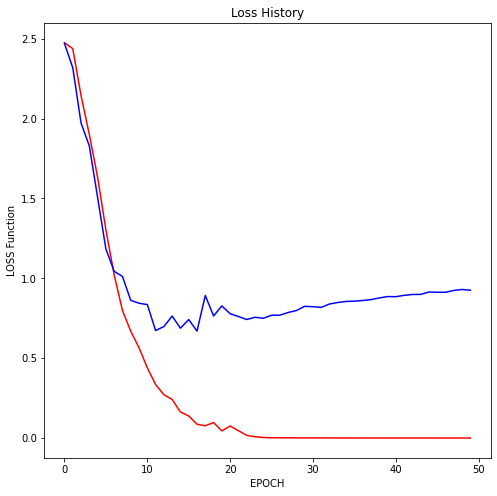

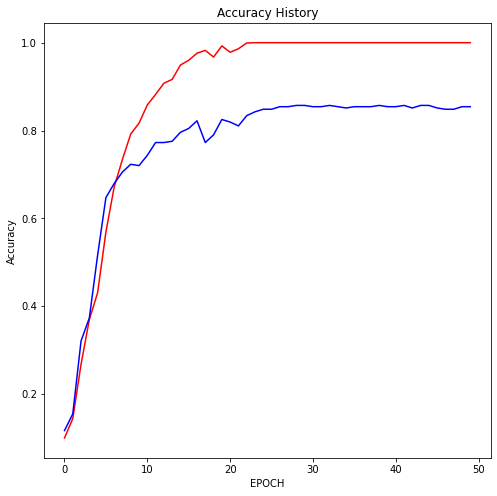

In [11]:
# 학습 결과를 그래프로 출력합니다.
draw_graph(history)

In [20]:
model.save('poster.h5')

In [20]:
imgg = cv2.imread("오달수_1.jpg")
imgg = cv2.resize(imgg, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
print(imgg.shape)
print(dr.train_X.shape)
print(dr.train_X[0].shape)

(90, 60, 3)
(195, 90, 60, 3)
(90, 60, 3)


In [13]:
## 예측용 데이터 불러오기
path2 = 'data/poster/'
file_list = os.listdir(path2)
data2 = []
count = 1
for A in file_list:
    if A == ".DS_Store":
        continue
    poster = Image.open(path2+A)
    data2.append((np.asarray(poster)))
    poster.close()

In [14]:
data2 = np.asarray(data2)/255.0

In [15]:
data2.shape

(10, 90, 60, 3)

In [16]:
file_list

['극한직업_2.jpg',
 '극한직업_3.jpg',
 '극한직업_1.jpg',
 '극한직업_4.jpg',
 '7번방_2.jpg',
 '7번방_3.jpg',
 '7번방_1.jpg',
 '7번방_4.jpg',
 '변호인_2.jpg',
 '변호인_1.jpg']

In [17]:
predictions2 = model.predict(data2)

2022-01-04 19:08:22.450541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
# 리스트 순서
#['이정재', '정진영', '마동석', '유해진', '황정민', '류승룡', '설경구', '오달수', '김향기', '하정우', '송강호', '전지현']
for x in predictions2:
    print(np.argmax(x))

6
1
5
0
10
3
9
4
10
1


In [19]:
predictions2

array([[3.10701464e-04, 2.37756030e-05, 5.99728210e-12, 3.95207508e-06,
        4.82884025e-06, 2.57446300e-13, 9.99019146e-01, 1.73537543e-07,
        3.42179497e-04, 2.18529266e-07, 2.94821104e-04, 1.47480080e-07],
       [2.26716296e-07, 9.76743460e-01, 7.99349280e-08, 7.99137059e-12,
        2.52496022e-07, 3.14164163e-06, 1.81058203e-04, 1.90030676e-08,
        8.31381138e-03, 1.47579024e-02, 5.05616029e-08, 4.03807343e-09],
       [4.67561949e-06, 2.48689753e-06, 1.20573933e-03, 2.00262428e-17,
        1.81896542e-08, 9.89618123e-01, 1.40069300e-04, 1.93181360e-09,
        1.55678928e-10, 9.02887248e-03, 1.18781905e-12, 5.95701670e-14],
       [4.73615617e-01, 8.28247219e-02, 1.34038327e-11, 6.48524529e-16,
        4.42839622e-01, 7.18280731e-04, 1.49505638e-06, 6.53940082e-18,
        2.12443581e-07, 4.98363262e-09, 1.48458448e-14, 7.37934798e-08],
       [3.24150982e-25, 2.66982283e-06, 2.43294409e-07, 6.98988935e-13,
        1.68088094e-29, 4.52950741e-15, 6.63410900e-15, 3.85